In [1]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [2]:
import pandas as pd
import numpy as np

In [8]:
red_df = pd.read_csv("winequality-red.csv")
white_df = pd.read_csv("winequality-white.csv")

In [9]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
red_df.shape

(1599, 12)

In [12]:
white_df.shape

(4898, 12)

In [13]:
red_df['type'] = 'red'
white_df['type'] = 'white'

In [14]:
wine = pd.concat([red_df, white_df], axis=0)

In [15]:
wine.shape

(6497, 13)

In [20]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [19]:
wine.columns = wine.columns.str.replace(' ', '_')

In [21]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [24]:
# 와인 품질의 종류
# quality
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [25]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='quality', ylabel='Count'>

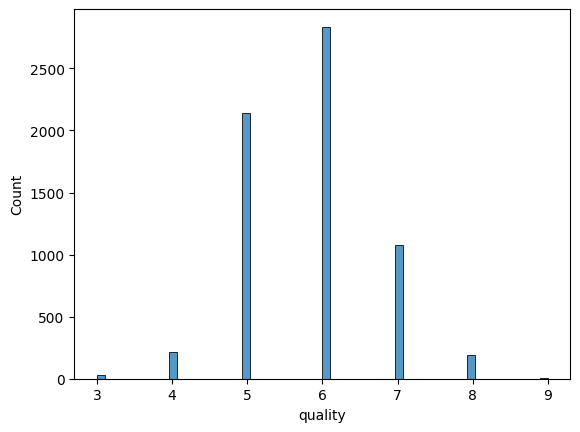

In [27]:
sns.histplot(data=wine['quality'])

In [31]:
# 와인별 품질에 대한 describe
grouped = wine.groupby(['type'])
grouped['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [33]:
grouped['quality'].agg(['mean', 'std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


# t-검증

In [34]:
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 9.1 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 7.2 MB/s eta 0:00:00


In [35]:
from scipy import stats

In [36]:
from statsmodels.formula.api import ols, glm

In [40]:
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']

In [42]:
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var=False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [50]:
result = ''
for idx, w in enumerate(wine.columns[:-2]):
    if idx == len(wine.columns[:-2])-1:
        result += f'{w}'
    else:
        result += f"{w} + "

In [53]:
result

'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [52]:
result = 'quality ~ ' + result

In [54]:
regression_result = ols(result, data=wine).fit()

In [55]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 03 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:13:17   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# quality와 type열은 회귀분석 모델에서 제외 독립변수만 추출
wine[wine.columns.difference(['quality', 'type'])].head()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [59]:
sample1 = wine.iloc[:, :-2]

In [63]:
sample1 = sample1[:5]

In [64]:
sample1_predict = regression_result.predict(sample1)
sample1_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [65]:
wine = wine.reset_index(drop=1)

In [67]:
wine.loc[:4, 'quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

# 타이타닉의 생존률 분석

In [68]:
titanic = sns.load_dataset('titanic')

In [69]:
titanic.rename(columns = {'sex':'gender'}, inplace=True)

In [70]:
titanic.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [73]:
# 결측치 확인
titanic.isnull().sum()

survived         0
pclass           0
gender           0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [72]:
# 나이는 전체 나이 평균으로 대체
titanic['age'].fillna(titanic['age'].median(), inplace=True)

In [75]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [76]:
titanic['embark_town'].fillna('Southampton', inplace=True)

In [77]:
titanic.loc[:, ['deck', 'embark_town']]

,deck,embark_town
0,NaN,Southampton
1,C,Cherbourg
2,NaN,Southampton
3,C,Southampton
4,NaN,Southampton
...,...,...
886,NaN,Southampton
887,B,Southampton
888,NaN,Southampton
889,C,Cherbourg


In [78]:
titanic['deck'].fillna('C', inplace=True)

In [79]:
titanic[titanic['embarked'].isnull()]

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True


In [80]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot: ylabel='survived'>

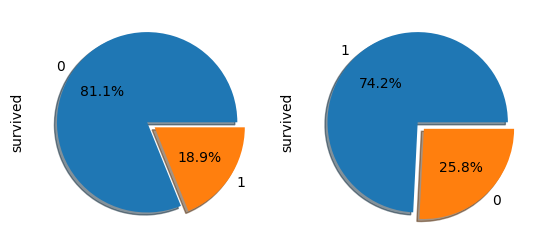

In [83]:
plt.subplot(1,2,1)
titanic[titanic['gender'] == 'male']['survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', shadow=True)

plt.subplot(1,2,2)
titanic[titanic['gender'] == 'female']['survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', shadow=True)

# 등급별 생존자 수
sns.coutplot, hue = 'survived'

<AxesSubplot: xlabel='pclass', ylabel='count'>

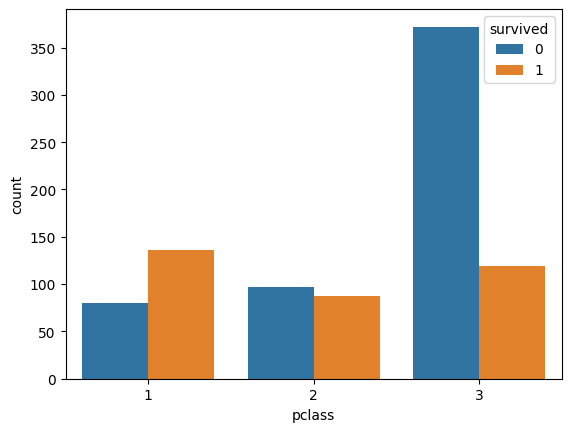

In [84]:
sns.countplot(data=titanic, hue='survived', x='pclass')

In [85]:
titanic.corr()

C:\Temp\ipykernel_9048\2964377706.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


# 특정변수 사이의 상관관계

In [86]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053259

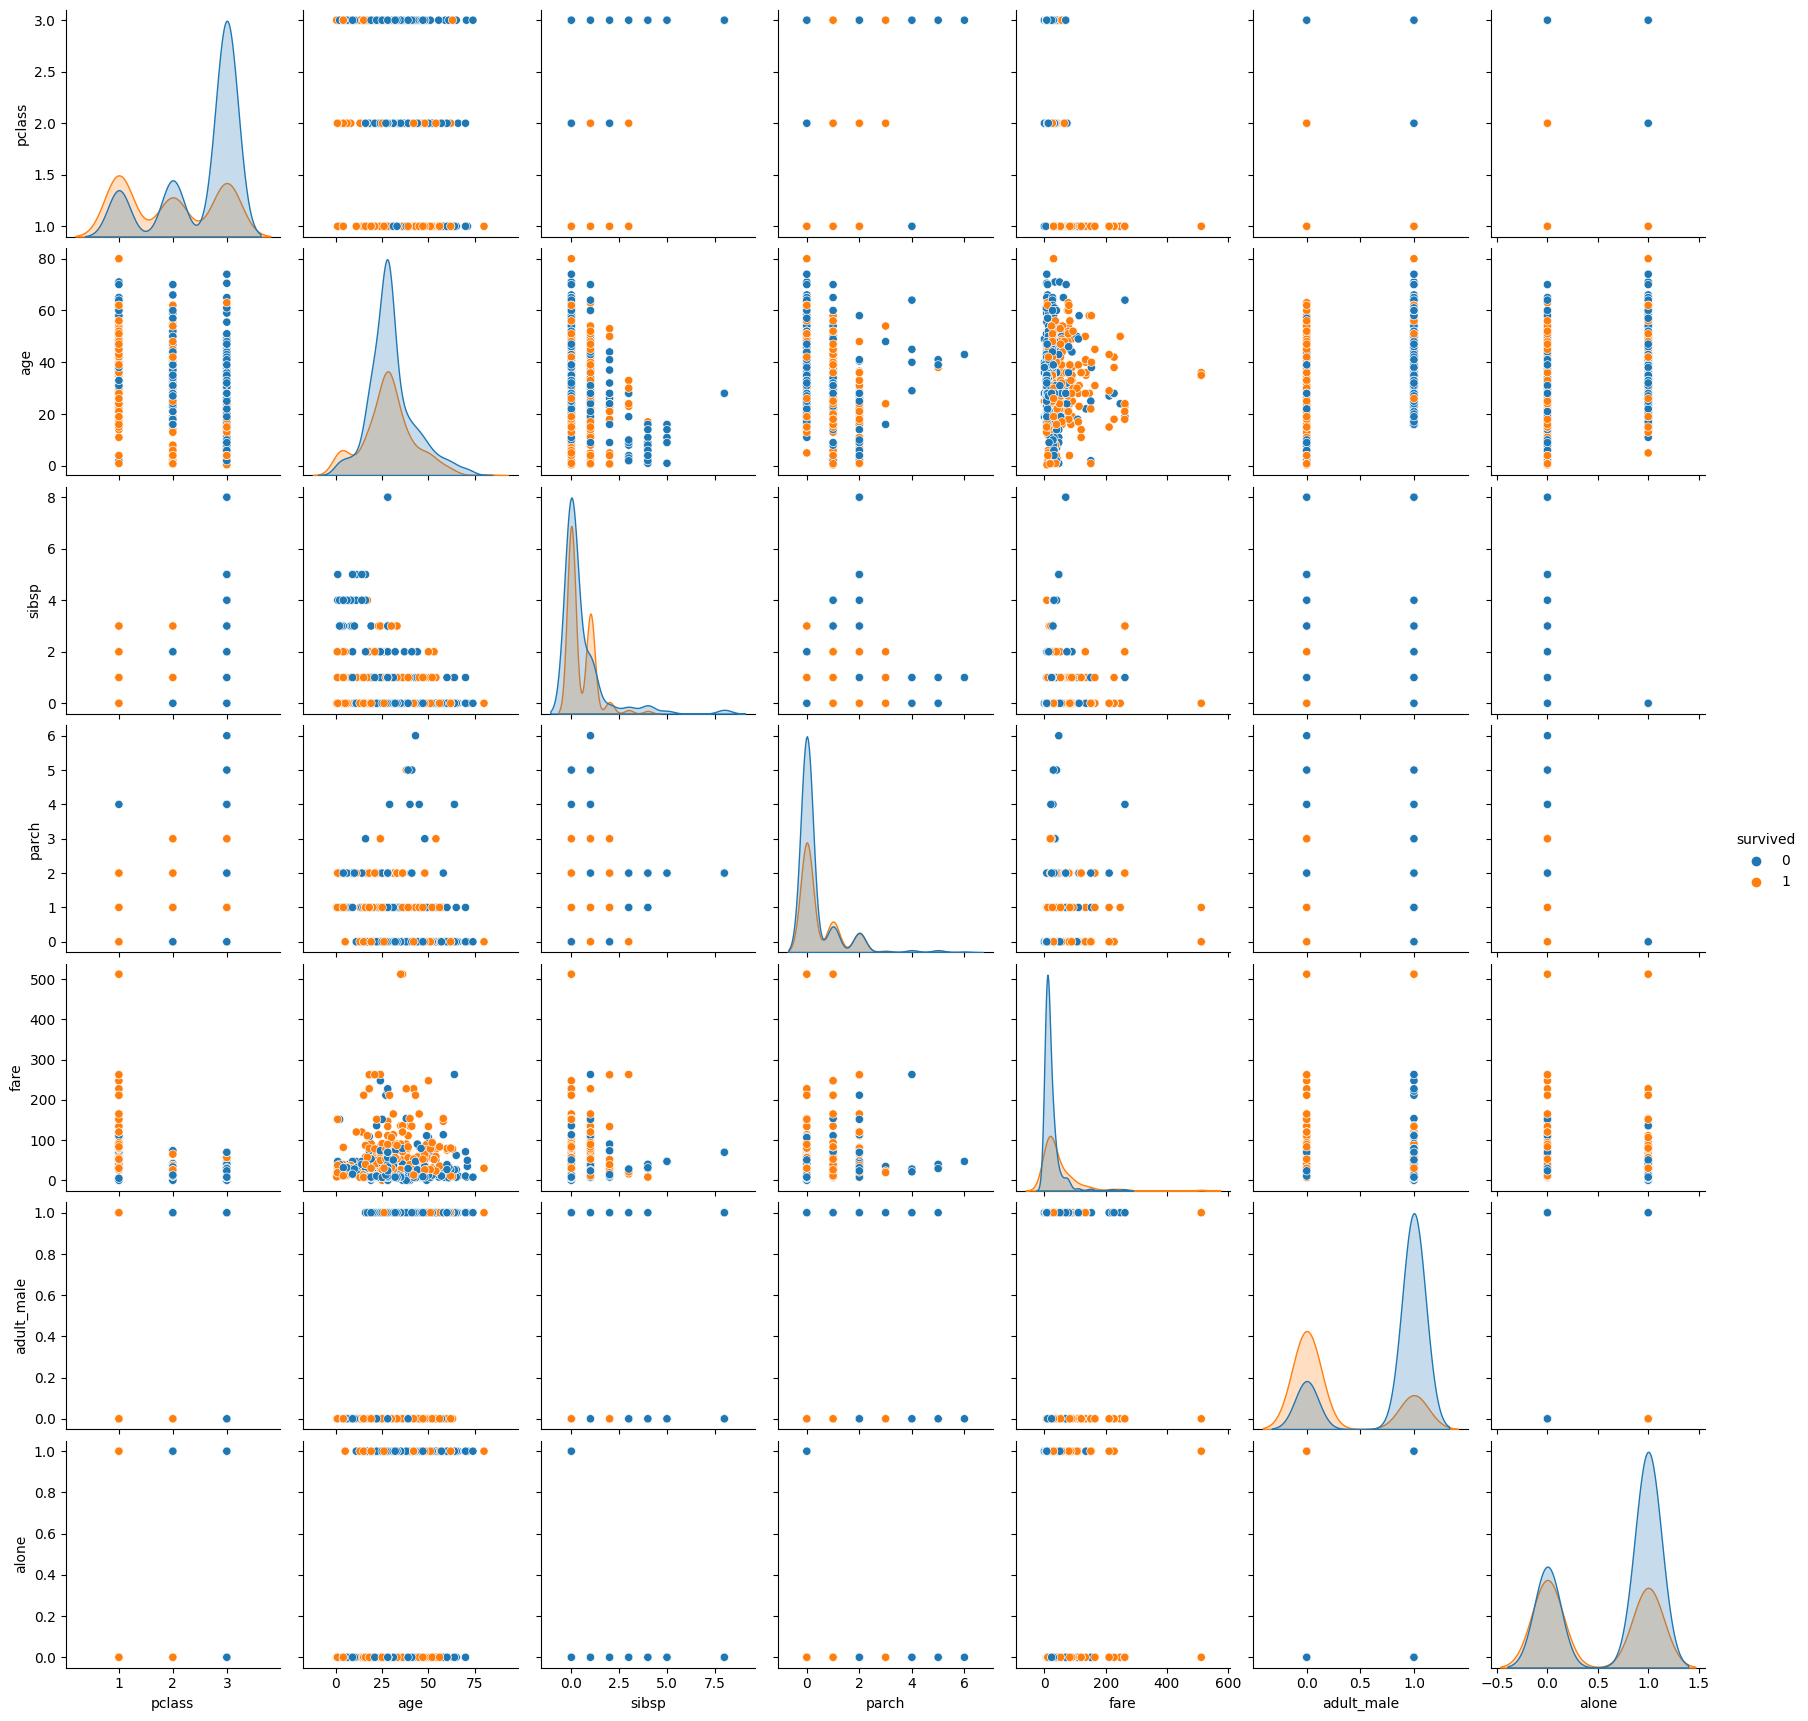

In [87]:
# 변수간의 상관관계를 시각화
sns.pairplot(titanic, hue='survived')

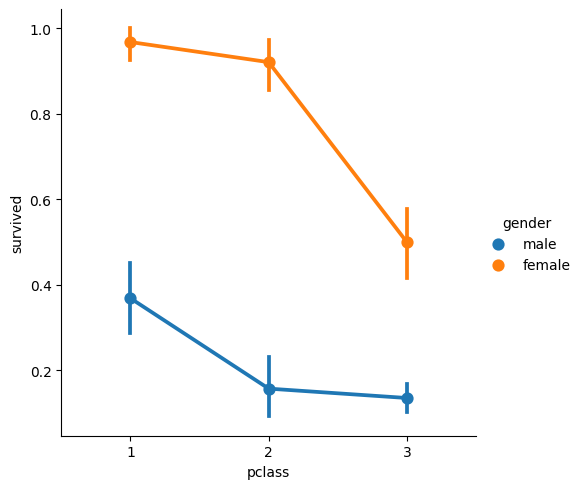

In [89]:
# 두 변수간의 상관관계 시각화
sns.catplot(data=titanic, x='pclass', y='survived', hue='gender', kind='point')

In [90]:
# 변수간의 상관계수를 히트맵으로 시각화
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [92]:
titanic['age2'] = titanic['age'].apply(category_age)

In [93]:
titanic['gender2'] = [1 if i == 'male' else 0 for i in titanic['gender']]

In [94]:
titanic['gender2'].value_counts()

1    577
0    314
Name: gender2, dtype: int64

In [95]:
titanic.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,gender2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1


In [96]:
titanic['gender'].map({'male':1, 'female':0})

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: gender, Length: 891, dtype: int64

In [99]:
titanic['alone2'] = titanic['alone'].map({False:0, True:1})

In [100]:
# age2, gender2, pclass, parch, fare
heatmap_data = titanic[['age2', 'gender2', 'pclass', 'parch', 'fare']]

In [101]:
# 컬러맵
colormap = plt.cm.RdBu

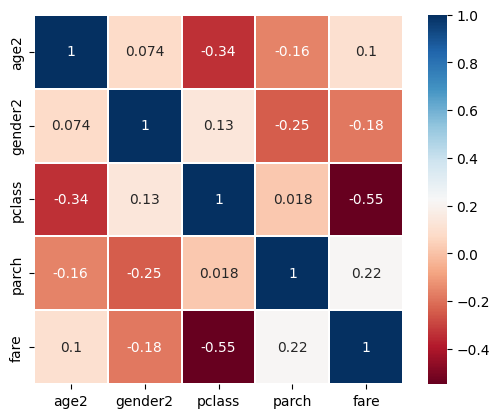

In [102]:
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':10})
plt.show()

# 예측모델 머신러닝

# 결정트리
### 데이터 확보 - 데이터 처리(스케일링, 전처리, 원핫인코딩) - 학습용 데이터 선택(피처선택) - 학습용과 검증용을 분리 - 모델 선택 - 선택
### 평가(F1 Score) -> 결과가 만족스러우면 적용(배포)

In [104]:
train_titanic = titanic[['survived', 'gender2', 'alone2', 'age2', 'fare', 'pclass']]

In [116]:
X = train_titanic.iloc[:,1:]
Y = train_titanic.iloc[:, 0]

In [117]:
X.shape, Y.shape

((891, 5), (891,))

In [118]:
# train, test 데이터로 분리
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=100)

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
dtc = DecisionTreeClassifier(max_depth=3)

In [122]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [123]:
from sklearn.metrics import f1_score

In [124]:
y_test_hat = dtc.predict(x_test)

In [125]:
f1_score(y_test, y_test_hat)

0.7464114832535885

In [126]:
dtc.score(x_test, y_test)

0.8022388059701493